In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [636]:
def load_data(pathfile):
    df = pd.read_csv(pathfile)
    df_ISPU = df[['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2','categori']]
    # Assuming 'df' is your original DataFrame

    # First, convert 'tanggal' to datetime
    df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])

    # Then, convert the columns to numeric, replacing invalid values with NaN
    df_ISPU['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
    df_ISPU['so2'] = pd.to_numeric(df['so2'], errors='coerce')
    df_ISPU['co'] = pd.to_numeric(df['co'], errors='coerce')
    df_ISPU['o3'] = pd.to_numeric(df['o3'], errors='coerce')
    df_ISPU['no2'] = pd.to_numeric(df['no2'], errors='coerce')
    
    
    #select where categori is SEDANG, BAIK, TIDAK SEHAT, SANGAT TIDAK SEHAT, BERBAHAYA

    df_ISPU = df_ISPU[df_ISPU['categori'].isin(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'])]

    print(df_ISPU.head())

    #rename SANGAT TIDAK SEHAT and BERBAHAYA to TIDAK SEHAT

    df_ISPU['categori'] = df_ISPU['categori'].replace(['SANGAT TIDAK SEHAT', 'BERBAHAYA'], 'TIDAK SEHAT')

    X=df_ISPU.drop(['categori'],axis=1)
    y=df_ISPU['categori']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

    

    

In [637]:
filepath='/Users/rianrachmanto/pypro/project/Jakarta-Air-Quality-Prediction/data/raw/merged_data.csv'
X_train,X_test,y_train,y_test = load_data(filepath)

     tanggal             stasiun  pm10  so2    co    o3   no2 categori
0 2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   SEDANG
1 2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0     BAIK
2 2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0     BAIK
3 2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0     BAIK
4 2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0     BAIK


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2164/2261100331.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2164/2261100331.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ISPU['tanggal'] = pd.to_datetime(df['tanggal'])
/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2164/2261100331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [638]:
def eda (X_train, y_train, X_test):
    #filter all numeric columns
    print(X_train.shape)
    print(y_train.shape)

    print(X_train.describe())

    #Check missing values in X_train, X_test, y_train, y_test
    print('Missing values in X_train: ', X_train.isnull().sum().sum())
    print('Missing values in X_test: ', X_test.isnull().sum().sum())
    print('Missing values in y_train: ', y_train.isnull().sum().sum())
    print('Missing values in y_test: ', y_test.isnull().sum().sum())

   #fill missing values in X_train and X_test with 0
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)

    #reset index X_train and X_test
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    X_train_numeric = X_train.select_dtypes(include=[np.number])
    

    plt.figure(figsize=(30,30))
    for i, col in enumerate(X_train_numeric.columns):
        plt.subplot(5,5,i+1)
        plt.hist(X_train_numeric[col])
        plt.title(col)  
    plt.show()  

    X_grouped = X_train.groupby('tanggal')[['pm10', 'co', 'o3', 'no2', 'so2']].mean().reset_index()
    print(X_grouped.head())

#plot all the features from X_grouped with for
    for i in X_grouped.columns[1:]:
        plt.figure(figsize=(30,5))
        plt.plot(X_grouped['tanggal'], X_grouped[i])
        plt.title(i)
    plt.show()

#plot box plot for X_train
    for i in X_train_numeric.columns:
        plt.figure(figsize=(10,5))
        plt.boxplot(X_train_numeric[i])
        plt.title(i)
    plt.show()

    
    #concat x_train and y_train
    df_train = pd.concat([X_train, y_train], axis=1)

    sns.countplot(x='categori',data=df_train)

    #plot heatmap correlation from df_train
    plt.figure(figsize=(10,10))
    sns.heatmap(df_train.corr(),annot=True,fmt='.2f',cmap='coolwarm')
    plt.show()


    return X_train, y_train, X_test


    

    

(14484, 7)
(14484,)
               pm10           so2            co            o3           no2
count  13869.000000  14060.000000  14189.000000  14006.000000  14095.000000
mean      52.733218     17.819346     21.532032     65.005069     12.661866
std       19.505993     12.404443     13.580355     37.259249     10.294922
min        2.000000      0.000000      0.000000      1.000000      1.000000
25%       40.000000      9.000000     12.000000     39.000000      7.000000
50%       55.000000     16.000000     19.000000     60.000000     11.000000
75%       65.000000     24.000000     28.000000     83.000000     15.000000
max      178.000000    112.000000    206.000000    314.000000    206.000000
Missing values in X_train:  2260
Missing values in X_test:  544
Missing values in y_train:  0
Missing values in y_test:  0


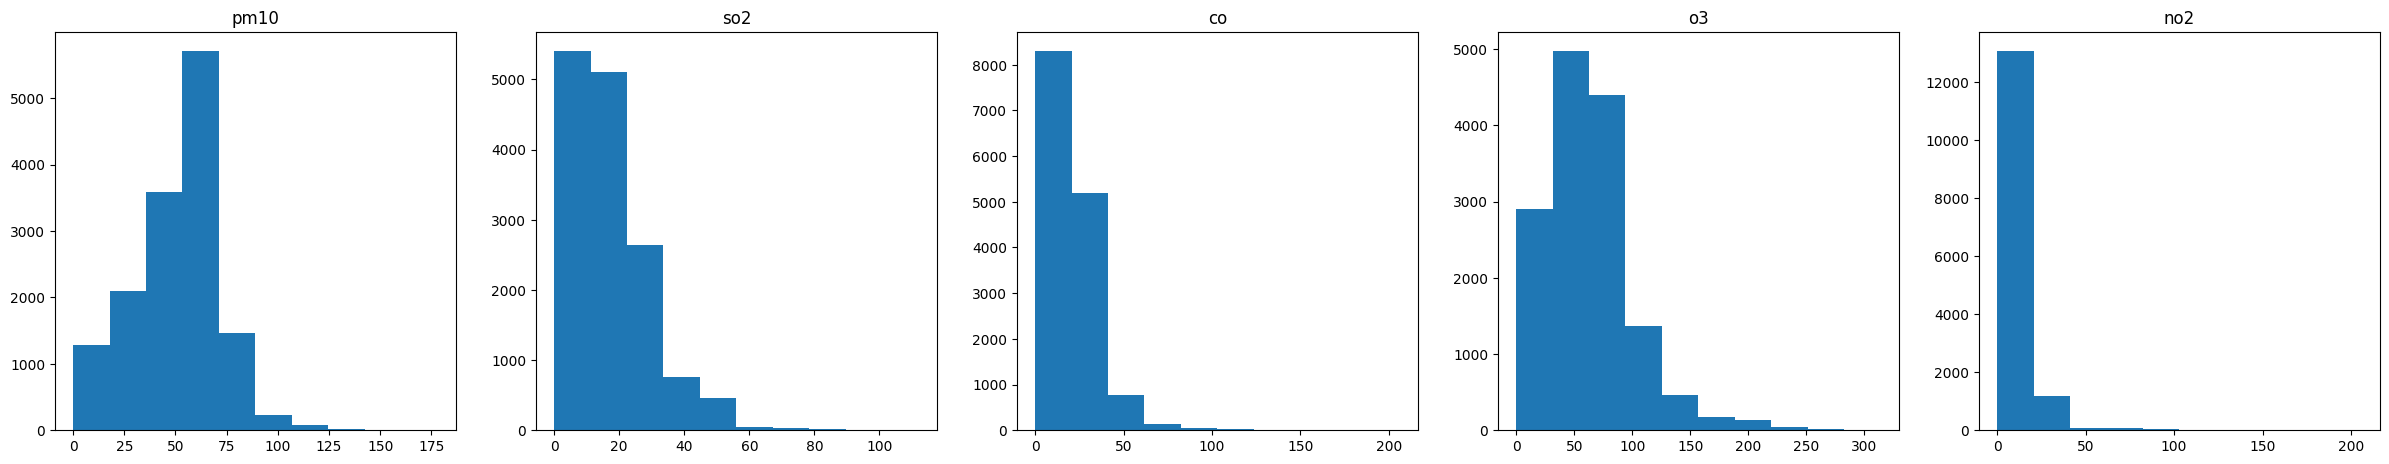

     tanggal  pm10    co    o3   no2  so2
0 2010-01-02  32.0  16.0  33.0   9.0  2.0
1 2010-01-03  27.0  19.0  20.0   9.0  2.0
2 2010-01-05  25.0  17.0  15.0   8.0  2.0
3 2010-01-06  30.0  22.0  19.0  11.0  3.0
4 2010-01-07  41.0  24.0  27.0  13.0  4.0


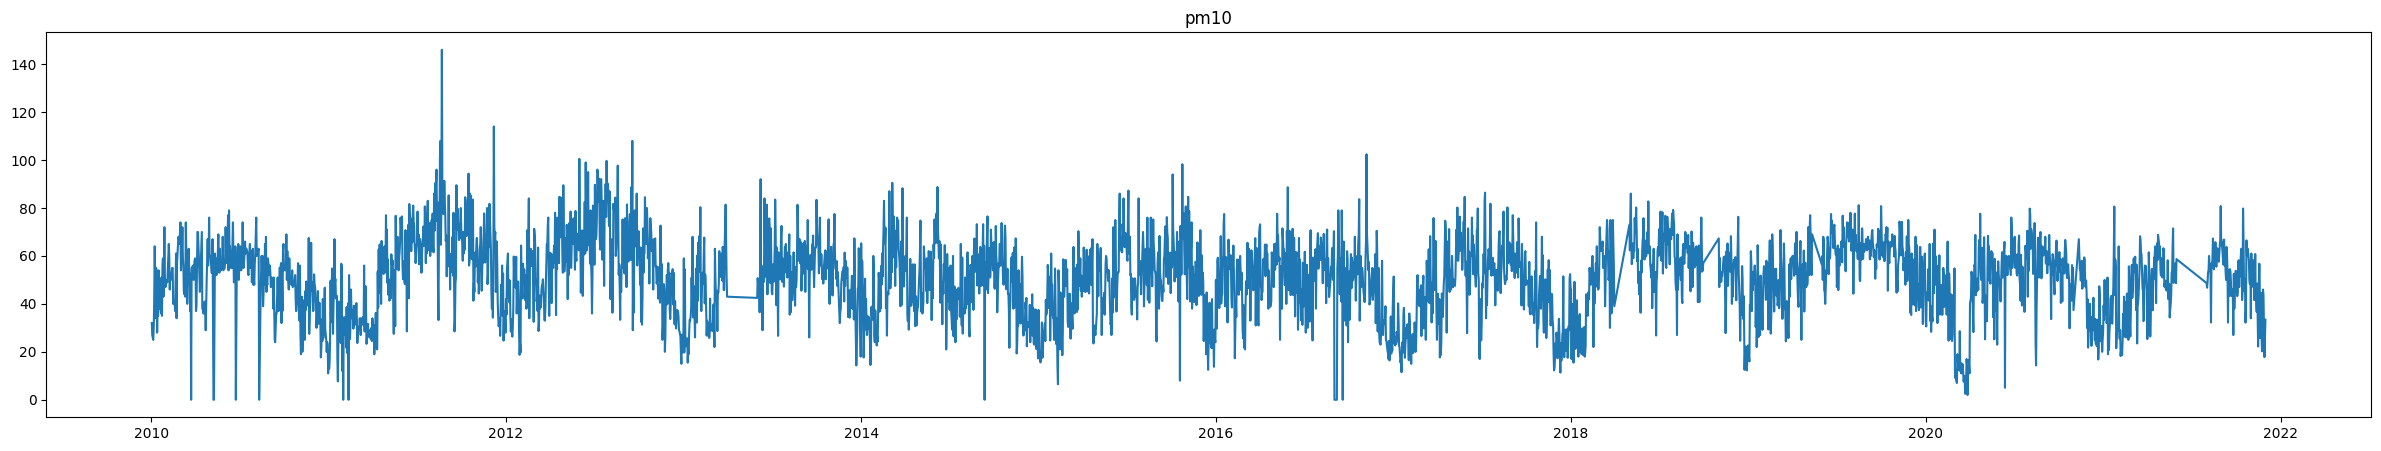

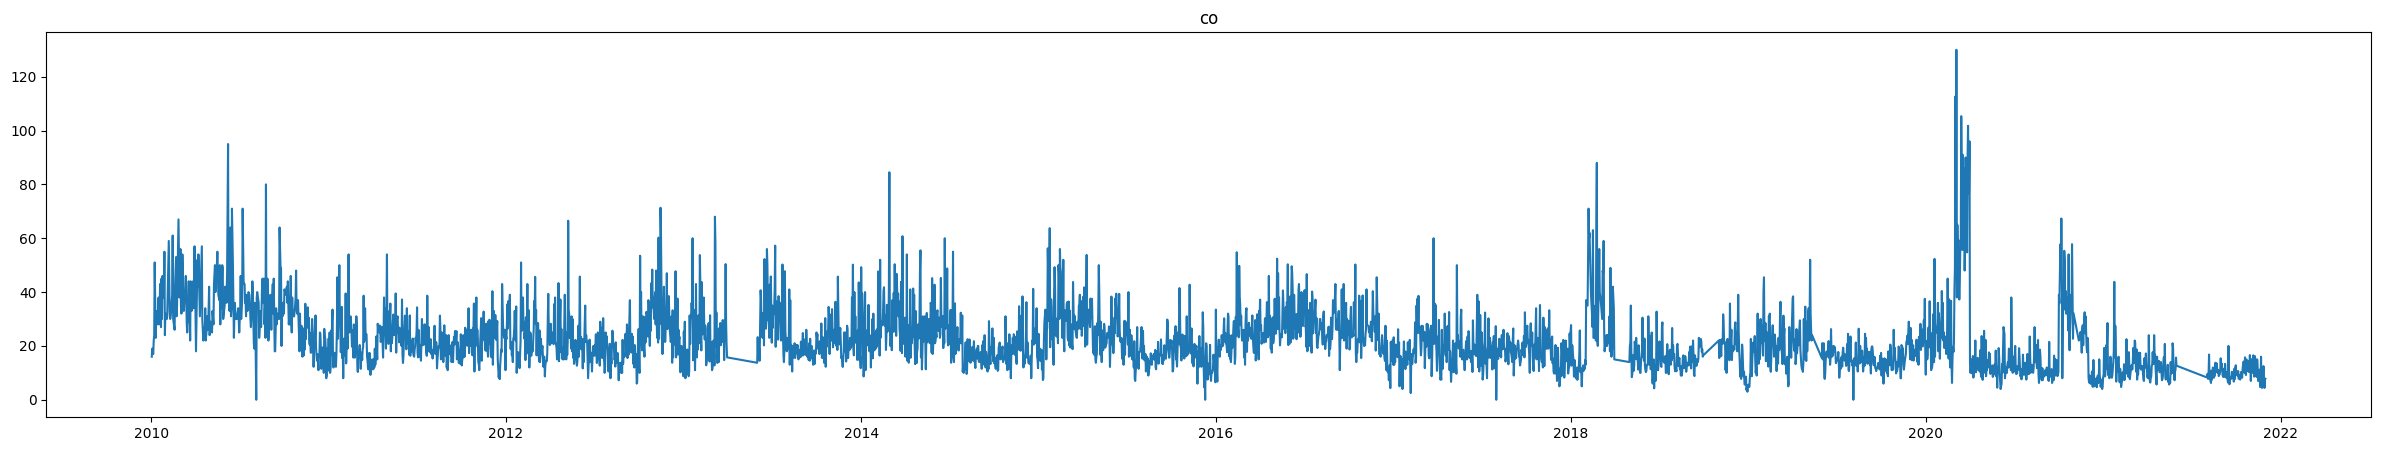

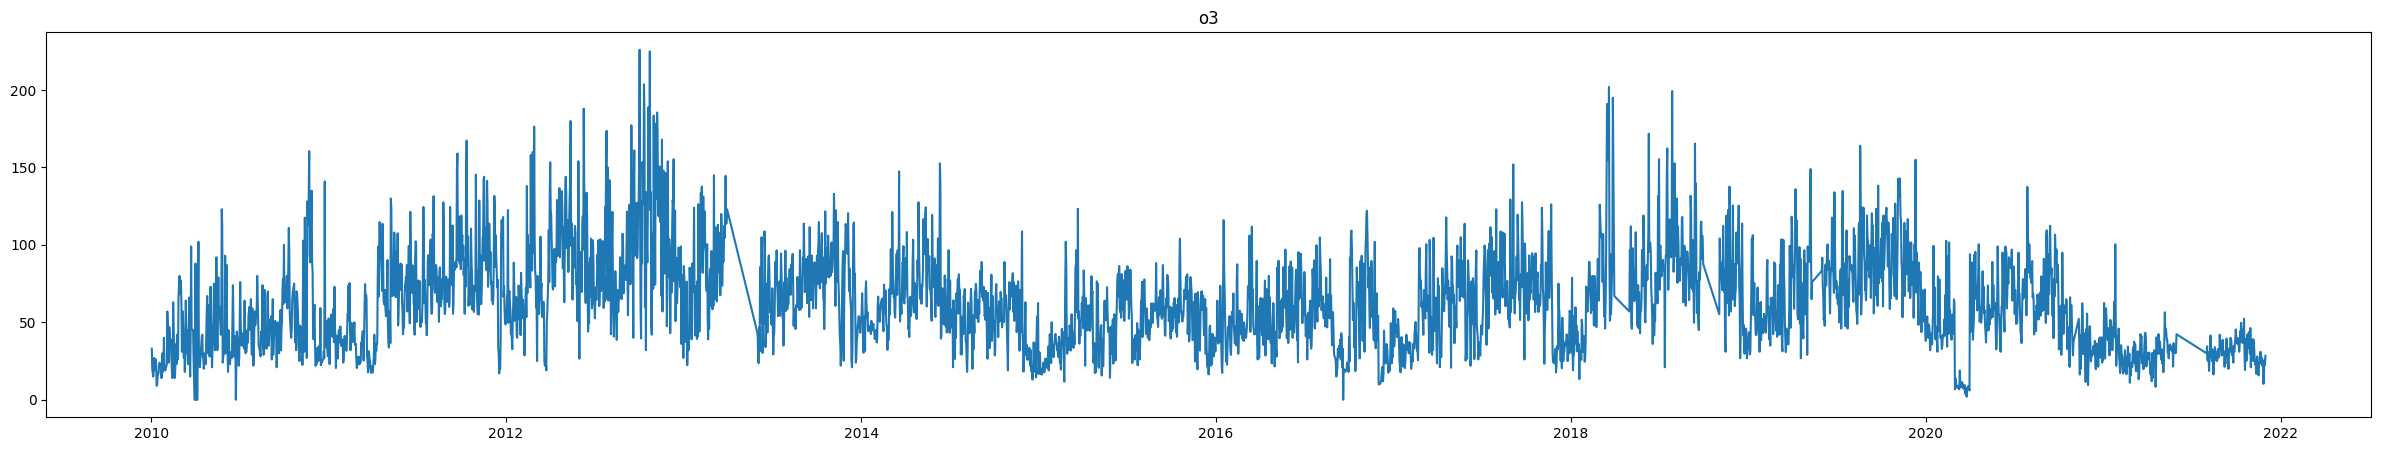

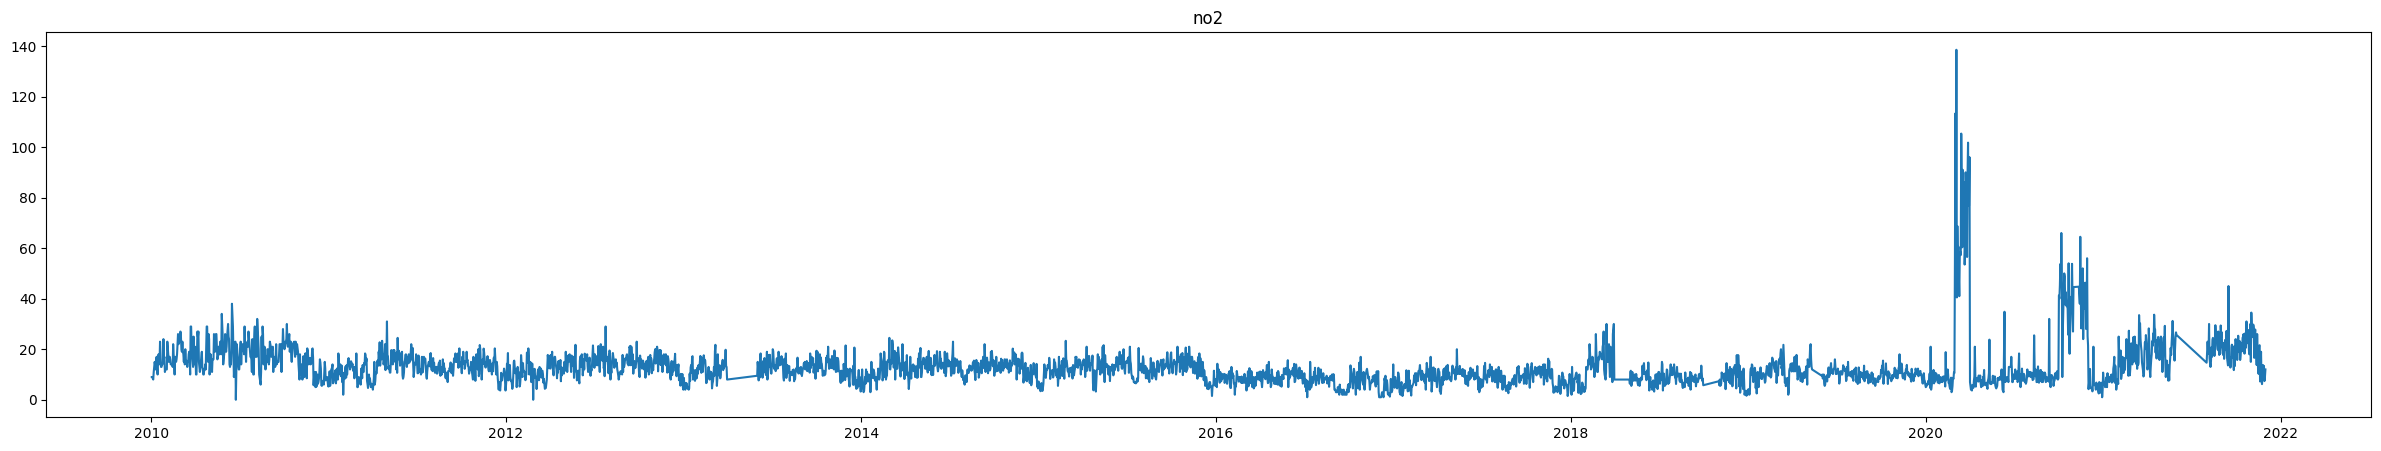

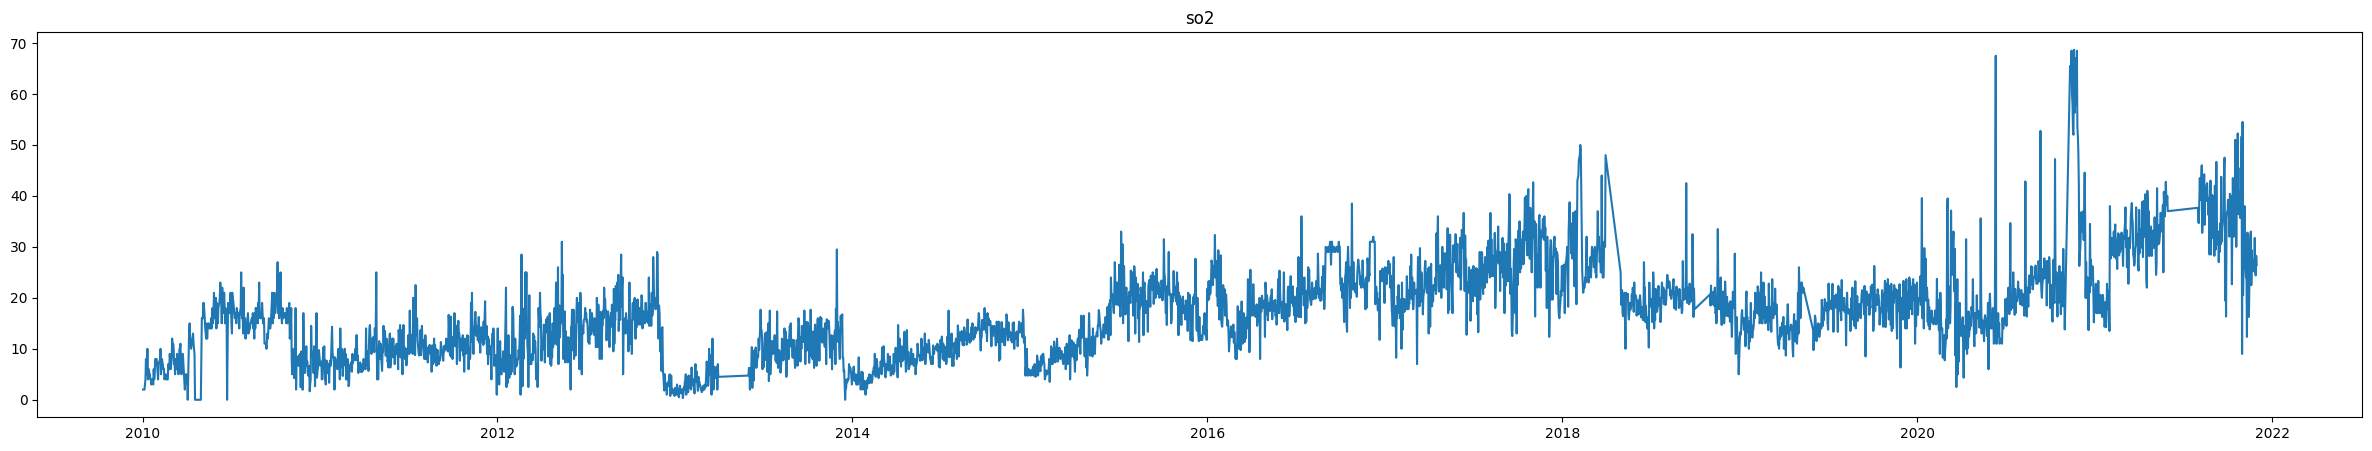

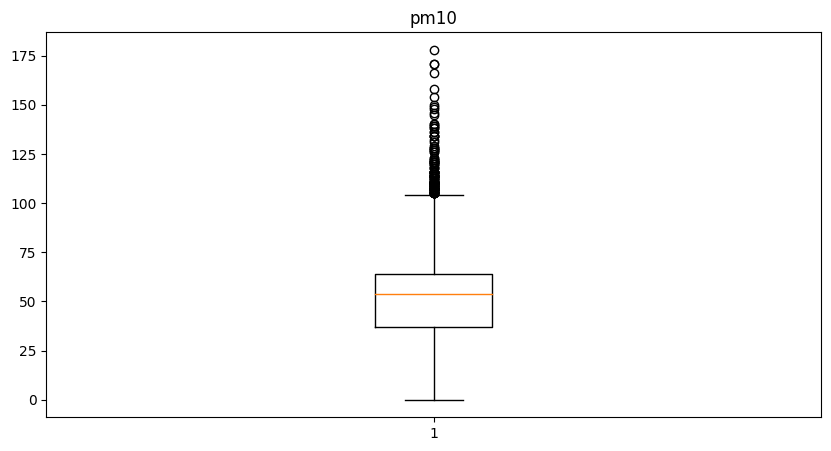

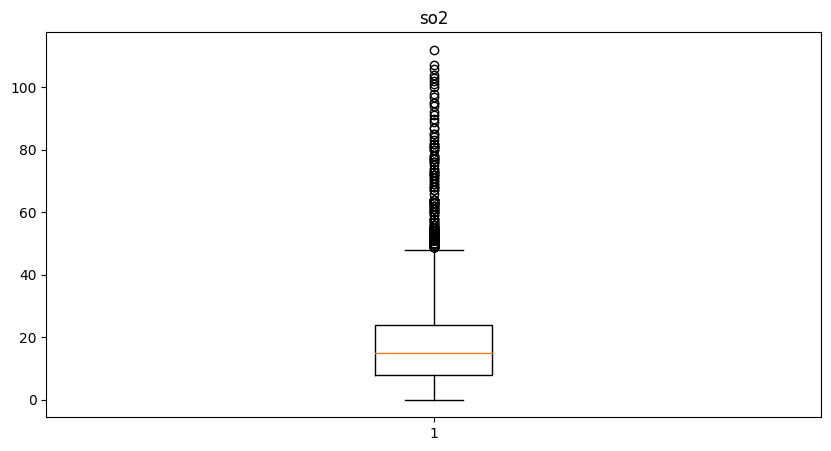

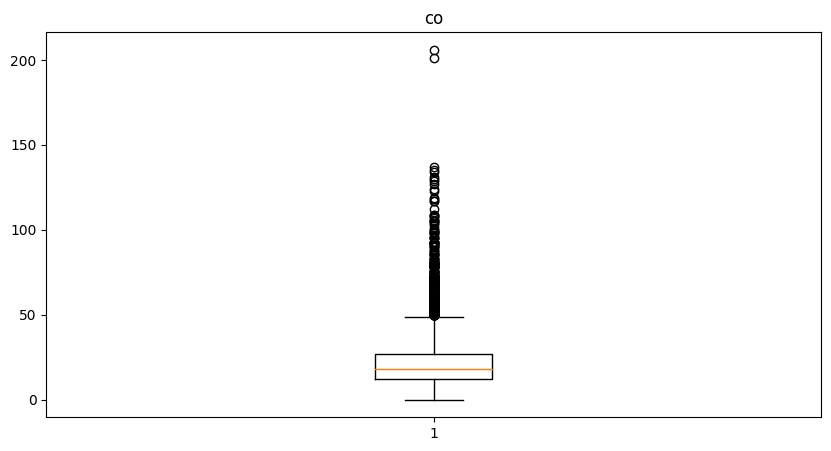

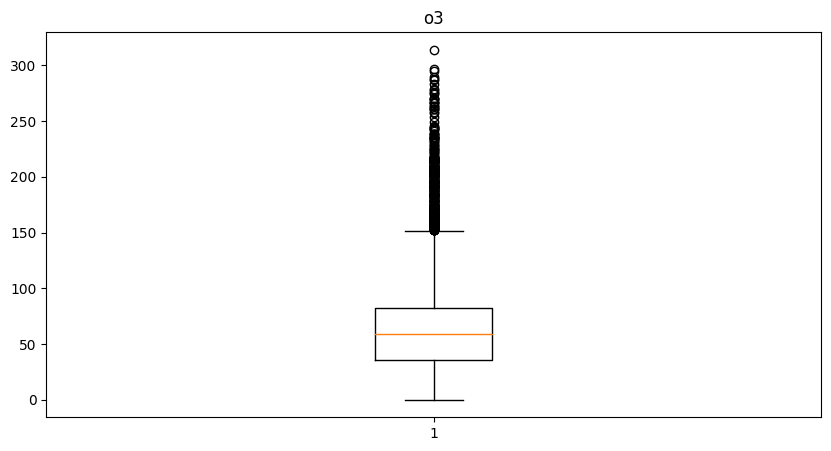

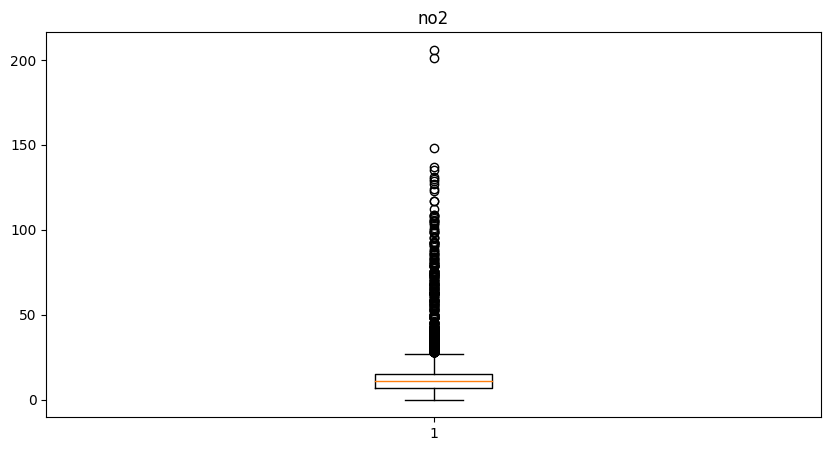

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_2164/3722870904.py:57: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,fmt='.2f',cmap='coolwarm')


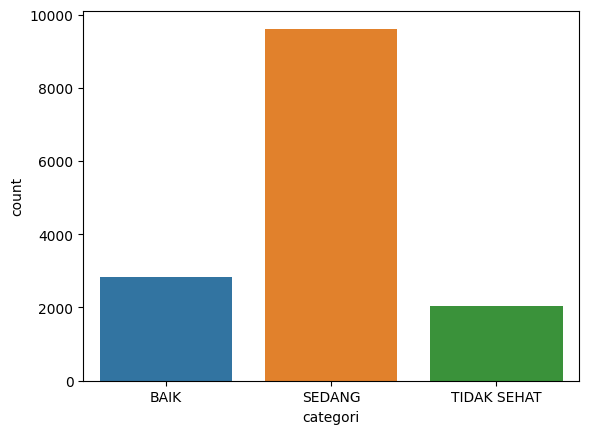

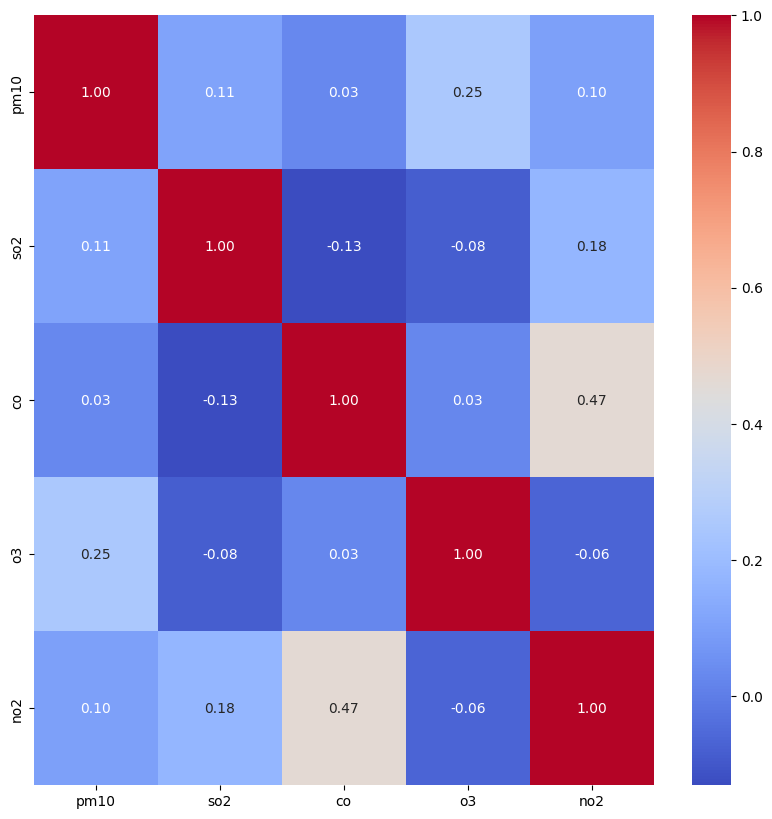

In [639]:
X_train, X_test, y_train =eda(X_train,y_train,X_test)

In [640]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
def feature_eng(X_train,X_test,y_train,y_test):
    #drop tanggal and stasiun
    X_train = X_train.drop(['tanggal','stasiun'],axis=1)
    X_test = X_test.drop(['tanggal','stasiun'],axis=1)

    print(X_train.head())
    print(X_test.head())

    #remove outliers using IQR
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    X_train = X_train[~((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

    #align y_train with X_train
    y_train = y_train[X_train.index]

    #label encoding
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)



    return X_train,X_test,y_train,y_test

In [642]:
feature_eng(X_train, X_test, y_train, y_test) 

ValueError: No axis named 1 for object type Series

In [ ]:
#make function baseline model using logistic regression
#import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#make function for logistic regression
def base_model(X_train, X_test, y_train, y_test):
    #make logistic regression model
    model = LogisticRegression()
    #fit the model
    model.fit(X_train, y_train)
    #predict the model
    y_pred = model.predict(X_test)
    #accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    #classification report
    cr = classification_report(y_test, y_pred)
    return accuracy, cm, cr


In [ ]:
accuracy, cm, cr = base_model(X_train,y_train,X_test,y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values